![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de una bicicleta durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://github.com/justmarkham/DAT8/blob/master/data/bikeshare.csv), [dicccionario de datos](https://www.kaggle.com/c/bike-sharing-demand/data).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [3]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)
# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)
# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour
# Visualización
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables hour y workingday, escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [4]:
# Celda 1.1
bikes.groupby('workingday').total.mean()

workingday
0    188.506621
1    193.011873
Name: total, dtype: float64

In [37]:
#maximo
bikes.groupby('workingday').total.max()

workingday
0    783
1    977
Name: total, dtype: int64

In [36]:
#minimo
bikes.groupby('workingday').total.min()

workingday
0    1
1    1
Name: total, dtype: int64

In [35]:
#desviacion estandar
bikes.groupby('workingday').total.std()

workingday
0    173.724015
1    184.513659
Name: total, dtype: float64

Vemos que el total de bicicletas alquiladas en un dia laboral en promedio es superior a la cantidad promedio de bicicletas alquiladas en un fin de semana o festivo. 
Todos los dias de la base tuvieron al menos 1 bicicleta alquilada. 
La variacion de las cantidas es alta tanto para dia laboral como para los otros dias. 

In [5]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

In [106]:
bikes.groupby('hour').total.max()

hour
0     283
1     168
2     119
3      66
4      28
5      57
6     213
7     596
8     839
9     414
10    539
11    647
12    757
13    729
14    730
15    724
16    783
17    970
18    977
19    743
20    551
21    584
22    502
23    256
Name: total, dtype: int64

La hora en la que en promedio se alquilan más bicicletas es a las 5pm (17) con 468, seguido de 6pm (189) infiriendo que coincide con la hora del regreso a casa luego de la jornada laboral, tambien hay un promedio alto a las 8am con 362, que coincide con el inicio de hora laboral y empiezan a funcionar los establecimientos comerciales y públicos. 

In [107]:
bikes.groupby('hour').total.std()

hour
0      43.620012
1      34.112105
2      26.110267
3      12.666442
4       4.217633
5      12.784293
6      54.745333
7     159.207044
8     231.723065
9      92.099209
10    101.807629
11    127.444294
12    143.881880
13    149.167185
14    147.563199
15    144.235670
16    145.664786
17    223.775485
18    219.908138
19    156.641732
20    116.411565
21     87.629319
22     69.844495
23     51.638004
Name: total, dtype: float64

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica de las rentas promedio por hora cuando la variable "workingday" es igual a 0 e igual a 1, respectivamente. Analice y escriba sus hallazgos.

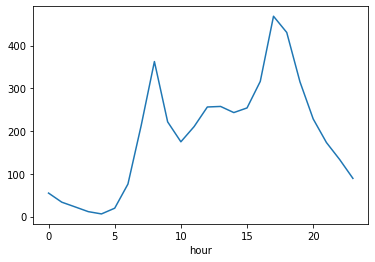

In [6]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

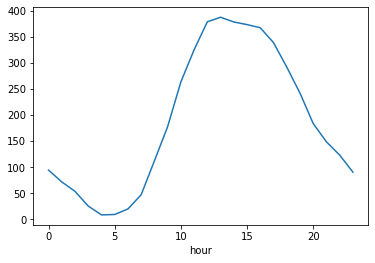

In [28]:
# Celda 2.2 - "workingday"=0 escriba su código y hallazgos 
workingday0= bikes.loc[bikes.loc[:, 'workingday']==0]
workingday0.groupby('hour').total.mean().plot()

En dias no laborales la curva es mas suave y se puede apreciar un pico en la tarde de las 12 a las 4 importante. 

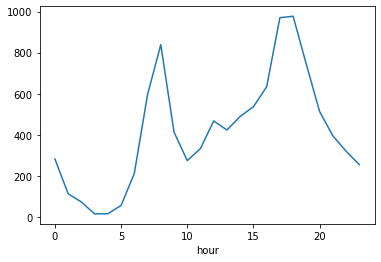

In [34]:
# Celda 2.3 - "workingday"=1 escriba su código y hallazgos 
workingday1= bikes.loc[bikes.loc[:, 'workingday']==1]
workingday1.groupby('hour').total.mean().plot()

Apreciamos un comportamiento muy parecido al general, con dos picos a las 8am y a las 4-6 pm lo cual habiamos detallado en el analisis de medidas de tendencia. 

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "hour" y "workingday" como las únicas variables predictoras. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [108]:
# Celda 3
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

XTotal = bikes[['hour', 'workingday']]
yTotal = bikes[['total']]

XTrain, XTest, yTrain, yTest = train_test_split(XTotal, yTotal, test_size=0.33, random_state=0)

regmodel = LinearRegression()
regmodel.fit(XTrain, yTrain)
pred = regmodel.predict(XTest)
# Error cuadrático medio
print("Mean squared error: %.2f" % mean_squared_error(yTest, pred))
# Evaluamos el puntaje de varianza (siendo 1.0 el mejor posible)
print('Variance score: %.2f' % r2_score(yTest, pred))
regmodel.coef_

Mean squared error: 27657.44
Variance score: 0.15


array([[10.55099422,  6.770441  ]])

Los coeficientes son positivos e indican que su importancia para la prediccion es directamente proporcional, por cada hora que transcurre del dia el alquiler de bicicletas es 10 veces mayor y cuando es dia laboral 6.8 veces. 
Cuando no es dia laboral el poder predictor de esa variable desaparece puesto que es cero su valor. 
De igual manera al ser tiempo no es sencillo de explicar su incidencia real en la variable y.

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "workingday". El árbol debe tener al menos 6 nodos finales.

In [49]:
# Celda 4
def split (XTrain, yTrain, cant_nodos, profundidad):
    if cant_nodos == profundidad or len(XTrain)<2:
        return {'prediction':np.mean(yTrain)}
    
    partition = find_best_partition(XTrain, yTrain)
    left_ix=XTrain[partition['feature']]<partition['threshold']
    partition['left'] = split(XTrain[left_ix], yTrain[left_ix], cant_nodos + 1, profundidad)
    partition['right'] = split(XTrain[~left_ix], yTrain[~left_ix], cant_nodos + 1, profundidad)
    return partition
partitions = split(XTrain, yTrain,6,6)

In [51]:
def find_best_partition(XTrain, yTrain):
    best_feature, best_threshold, min_rss = None, None, np.inf
    for feature in XTrain.columns:
        thresholds=XTrain[feature].unique().tolist()
        thresholds.sort()
        thresholds = XTrain[1:]
        for t in thresholds:
            y_left_ix = XTrain[feature] < t
            y_left, y_right = yTrain[y_left_ix], yTrain[~y_left_ix]
            t_rss = rss(y_left, y_right)
            if t_rss < min_rss:
                min_rss = t_rss
                best_threshold = t
                best_feature = feature
    return {'feature': best_feature, 'threshold': best_threshold}
        

In [52]:
def predict (XTest, partitions):
    for sample in XTest:
        prediction = None
        while prediction is None:
            feature, threshold = partitions ['feature'], partitions['threshold']
            if XTest[feature]< threshold:
                partitions = partitions ['left']
            else:
                partitions = partitions ['right']
            prediction = partitions.get('prediction', None)
    return prediction

In [56]:
partitions = split(XTrain, yTrain,6,6)
partitions

{'prediction': total    189.627314
 dtype: float64}

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "hour" y "workingday" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

Text(0, 0.5, 'r2')

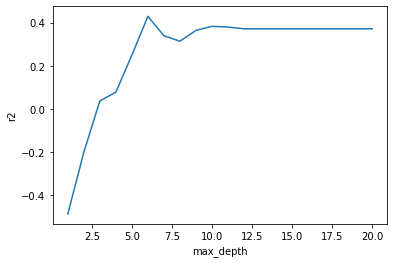

In [64]:
# Celda 5
# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 21)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
r2 = []

# Importación de modelos de sklearn 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    r2.append(cross_val_score(clf, XTotal, yTotal, cv=10, scoring='r2').mean())
# Gráfica max_depth versus RMSE (error del modelo)
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('r2')

In [65]:
sorted(zip(r2, max_depth_range))[::-1][0]

(0.42966326068979477, 6)

In [ ]:
clf = DecisionTreeClassifier(max_depth=6, random_state=1)
clf.fit(XTotal, yTotal)

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la populridad esta dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el sigueinte enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [66]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [67]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [68]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

Calibración parametro

In [80]:
# Celda 6
# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_leaf_nodes = range(1, 50)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
accuracy_scores = []

# Importación de modelos de sklearn 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for max_leaf_node in max_leaf_nodes:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf = DecisionTreeClassifier(max_leaf_nodes=max_leaf_node)
    accuracy_scores.append(cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy').mean())

Text(0, 0.5, 'Accuracy')

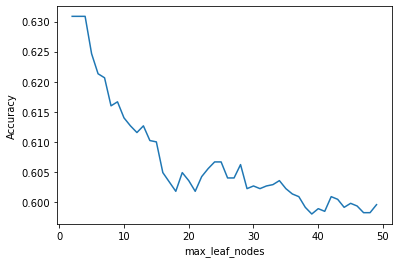

In [81]:
plt.plot(max_leaf_nodes, accuracy_scores)
plt.xlabel('max_leaf_nodes')
plt.ylabel('Accuracy')

In [82]:
sorted(zip(accuracy_scores, max_leaf_nodes))[::-1][0]

(0.6308888888888888, 4)

In [ ]:
clf = DecisionTreeClassifier(max_leaf_nodes=4, random_state=1)
clf.fit(XTotal, yTotal)
f1_score(y_test, prediccionesRegLog, average='macro'), metrics.accuracy_score(y_pred, y_test)

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

clfRegLog= LogisticRegression(random_state=0,max_iter=10000)
clfRegLog.fit(X_train, y_train)
prediccionesRegLog=clfRegLog.predict(X_test)
prediccionesProbRegLog=clfRegLog.predict_proba(X_test)

f1_score(y_test, prediccionesRegLog, average='macro'), metrics.accuracy_score(y_pred, y_test)


0.6155728587319242

Luego de realizar la calibracion del parametro y comparar los dos modelos, encuentro con una mejor desempeño el modelo de arboles de decision.

### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth = None\
-100 árboles de decisión donde max_depth = 2\
-100 regresiones logísticas

Evalúe los modelos utilizando las métricas de Accuracy y F1-Score.

In [93]:
# Celda 7
# Definición del modelo BaggingClassifier de la libreria sklearn
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth = None), n_estimators=100, 
                        max_samples = 300, bootstrap=True,random_state=42, n_jobs=-1, oob_score=True)

# Predicción y desempeño al hacer votación mayoritaria
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)
f1_score1=metrics.f1_score(y_pred, y_test)
Accuaracy1 =  metrics.accuracy_score(y_pred, y_test)

In [94]:
clf2 = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth = 2), n_estimators=100, 
                        max_samples = 300, bootstrap=True,random_state=42, n_jobs=-1, oob_score=True)

# Predicción y desempeño al hacer votación mayoritaria
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)
f1_score2=metrics.f1_score(y_pred, y_test)
Accuaracy2 =  metrics.accuracy_score(y_pred, y_test)

In [95]:
clf3 = BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=100, 
                        max_samples = 300, bootstrap=True,random_state=42, n_jobs=-1, oob_score=True)

# Predicción y desempeño al hacer votación mayoritaria
clf3.fit(X_train, y_train)
y_pred = clf3.predict(X_test)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)
f1_score3=metrics.f1_score(y_pred, y_test)
Accuaracy3 =  metrics.accuracy_score(y_pred, y_test)

### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [96]:
# Celda 8
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth = None), n_estimators=100, 
                        max_samples = 300, bootstrap=True,random_state=42, n_jobs=-1, oob_score=True)

# Predicción y desempeño al hacer votación mayoritaria
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

errors = np.zeros(clf.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], clf.n_estimators))

for i in range(clf.n_estimators):
    oob_sample = ~clf.estimators_samples_[i]
    y_pred_ = clf.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = clf.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)

metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

f1_score4=metrics.f1_score(y_pred, y_test)
Accuaracy4 =  metrics.accuracy_score(y_pred, y_test)

In [97]:
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth = 2), n_estimators=100, 
                        max_samples = 300, bootstrap=True,random_state=42, n_jobs=-1, oob_score=True)

# Predicción y desempeño al hacer votación mayoritaria
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

errors = np.zeros(clf.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], clf.n_estimators))

for i in range(clf.n_estimators):
    oob_sample = ~clf.estimators_samples_[i]
    y_pred_ = clf.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = clf.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)

metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

f1_score5=metrics.f1_score(y_pred, y_test)
Accuaracy5 =  metrics.accuracy_score(y_pred, y_test)

In [98]:
clf = BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=100, 
                        max_samples = 300, bootstrap=True,random_state=42, n_jobs=-1, oob_score=True)

# Predicción y desempeño al hacer votación mayoritaria
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

errors = np.zeros(clf.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], clf.n_estimators))

for i in range(clf.n_estimators):
    oob_sample = ~clf.estimators_samples_[i]
    y_pred_ = clf.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = clf.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)

metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

f1_score6=metrics.f1_score(y_pred, y_test)
Accuaracy6 =  metrics.accuracy_score(y_pred, y_test)

### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

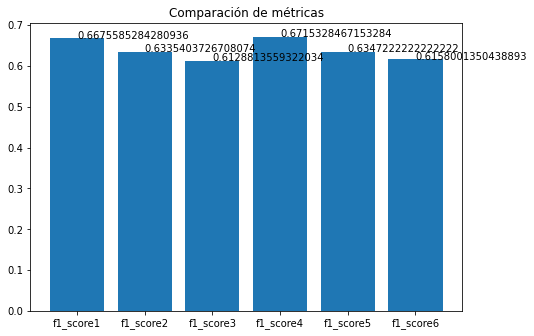

In [104]:
# Celda 9
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de métricas")
ejeX = ['f1_score1', 'f1_score2', 'f1_score3','f1_score4', 
        'f1_score5', 'f1_score6']
ejeY = [f1_score1, f1_score2, f1_score3,f1_score4, 
        f1_score5, f1_score6]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

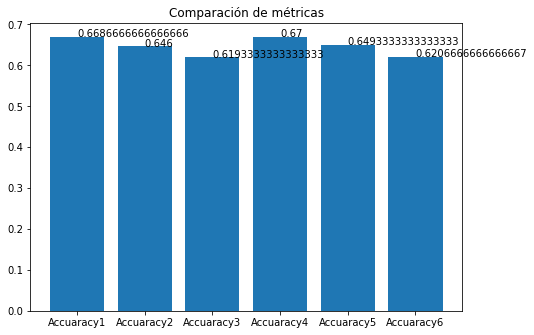

In [105]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de métricas")
ejeX = [ 'Accuaracy1', 'Accuaracy2', 'Accuaracy3', 'Accuaracy4', 'Accuaracy5', 'Accuaracy6']
ejeY = [Accuaracy1, Accuaracy2, Accuaracy3, Accuaracy4, Accuaracy5, Accuaracy6]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

En comparacion con los demas. el modelo con mejor desempeño es (4) 100 árboles de decisión donde max_depth = None Votación ponderada ya que tiene un f1_score y precision en 0.67. 
Podemos observar que para este caso, regresion logistica tiene un desempeño inferior a los arboles de decision y que la construccion del arbol hasta llegar a hojas puras entrega mejores resultados asumiendo el costo computacional que esto implica. 